## om live cell 
### 30th dec 2022
### 3rd Jan 2023 - rds - was not needed...dint not work anyway
### 7th Jan 2023 - third take on the data 
### 13th Jan 2023 - plotting just the tSNE

In [113]:
import numpy as np
import pandas as pd
import scipy.integrate
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML
import time
import multiprocessing as mp
import os

from scipy.stats import zscore

from sklearn.manifold import TSNE
from sklearn.mixture import BayesianGaussianMixture

import phenograph as pg
import random

In [2]:
#!pip install pyreadr
import pyreadr


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [140]:
path_data = 'NCI-N87_3D_forMistic/FoFX002005_221018_brightfield/FoF7002005_221018_brightfield/' # FoFX001003_221018_brightfield/FoF7001003_221018_brightfield/' #'Archive/FoF7002005_221018_brightfield/'

In [142]:

line =7000
for fname in sorted(os.listdir(path_data)):  
    print(fname)
    lc = np.int32(str.split(str.split(fname,"_")[1],'.')[0])
    #print('reading in FOV '+ str(count))
    os.rename(path_data+fname, path_data+str(line+lc)+'.png')
    
    

cell_10.png
cell_102.png
cell_103.png
cell_106.png
cell_107.png
cell_108.png
cell_110.png
cell_111.png
cell_112.png
cell_116.png
cell_118.png
cell_119.png
cell_12.png
cell_120.png
cell_121.png
cell_122.png
cell_126.png
cell_127.png
cell_128.png
cell_135.png
cell_137.png
cell_14.png
cell_141.png
cell_15.png
cell_17.png
cell_20.png
cell_23.png
cell_24.png
cell_26.png
cell_27.png
cell_28.png
cell_30.png
cell_31.png
cell_35.png
cell_38.png
cell_39.png
cell_4.png
cell_40.png
cell_44.png
cell_45.png
cell_47.png
cell_48.png
cell_52.png
cell_55.png
cell_56.png
cell_57.png
cell_58.png
cell_59.png
cell_61.png
cell_62.png
cell_63.png
cell_64.png
cell_65.png
cell_66.png
cell_67.png
cell_68.png
cell_69.png
cell_7.png
cell_70.png
cell_71.png
cell_76.png
cell_77.png
cell_78.png
cell_79.png
cell_80.png
cell_82.png
cell_83.png
cell_84.png
cell_85.png
cell_86.png
cell_88.png
cell_89.png
cell_91.png
cell_92.png
cell_93.png
cell_95.png
cell_96.png
cell_97.png
cell_98.png
cell_99.png


9

In [ ]:
count_matrix =  np.array(pd.read_csv('output/count_data.csv', header=None,index_col=None)) #
#count_matrix_gene =  np.array(pd.read_csv('Slide5_exprMat_file.csv', header=None,index_col=None)) #

#count_matrix =  np.array(pd.read_csv('Slide4_exprMat_file.csv', header=None,index_col=None)) #
#count_matrix =  np.array(pd.read_csv('Slide3_exprMat_file.csv', header=None,index_col=None)) #
#count_matrix =  np.array(pd.read_csv('Slide2_exprMat_file.csv', header=None,index_col=None)) #
#count_matrix =  np.array(pd.read_csv('Slide1_exprMat_file.csv', header=None,index_col=None)) #

#### rds file check

In [4]:
result = pyreadr.read_r('Archive/FoF1002005_221018_brightfield/nucleus_87.rds') # 

LibrdataError: Invalid file, or file has unsupported features

In [7]:
pip install rpy2


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()



ImportError: dlopen(/opt/anaconda3/lib/python3.7/site-packages/_cffi_backend.cpython-37m-darwin.so, 0x0002): Library not loaded: '@rpath/libffi.7.dylib'
  Referenced from: '/opt/anaconda3/lib/python3.7/site-packages/_cffi_backend.cpython-37m-darwin.so'
  Reason: tried: '/opt/anaconda3/lib/libffi.7.dylib' (no such file), '/opt/anaconda3/lib/libffi.7.dylib' (no such file), '/opt/anaconda3/lib/python3.7/site-packages/../../libffi.7.dylib' (no such file), '/opt/anaconda3/lib/libffi.7.dylib' (no such file), '/opt/anaconda3/lib/libffi.7.dylib' (no such file), '/opt/anaconda3/lib/python3.7/site-packages/../../libffi.7.dylib' (no such file), '/opt/concourse/worker/volumes/live/d698b2ce-b4b9-4fb4-6268-e633fba1b324/volume/python_1565725718142/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehol/lib/libffi.7.dylib' (no such file), '/opt/concourse/worker/volumes/live/d698b2ce-b4b9-4fb4-6268-e633fba1b324/volume/python_1565725718142/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehol/lib/libffi.7.dylib' (no such file), '/opt/anaconda3/bin/../lib/libffi.7.dylib' (no such file), '/opt/concourse/worker/volumes/live/d698b2ce-b4b9-4fb4-6268-e633fba1b324/volume/python_1565725718142/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehol/lib/libffi.7.dylib' (no such file), '/opt/concourse/worker/volumes/live/d698b2ce-b4b9-4fb4-6268-e633fba1b324/volume/python_1565725718142/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehol/lib/libffi.7.dylib' (no such file), '/opt/anaconda3/bin/../lib/libffi.7.dylib' (no such file), '/usr/local/lib/libffi.7.dylib' (no such file), '/usr/lib/libffi.7.dylib' (no such file)

In [6]:
readRDS = robjects.r['readRDS']
df = readRDS('Archive/FoF1002005_221018_brightfield/nucleus_87.rds')
df = pandas2ri.ri2py(df)

NameError: name 'robjects' is not defined

#### multidimensional color scheme

In [3]:
pip install cmap2d

ERROR: Could not find a version that satisfies the requirement cmap2d (from versions: none)
ERROR: No matching distribution found for cmap2d

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%matplotlib inline
%load_ext autoreload
% autoreload 2

import cmap2d
import math
import numpy as np

In [44]:
num_colour = 5
cm = plt.cm.get_cmap('tab20', num_colour)

In [29]:
type(cm.colors)

numpy.ndarray

In [30]:
cm.colors[0]

array([0.12156863, 0.46666667, 0.70588235, 1.        ])

In [39]:
import matplotlib.pyplot as plt
from matplotlib import colors

In [48]:
#cm = plt.cm.get_cmap('tab20', num_colour)
colors1 = [colors.to_hex(cm.colors[0]),colors.to_hex(cm.colors[0])]

In [49]:
colors1

['#1f77b4', '#1f77b4']

In [35]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.colors as cm

In [36]:
colors = [cm.to_hex(plt.cm.tab20(i)) for i in range(20)]

In [37]:
colors

['#1f77b4',
 '#aec7e8',
 '#ff7f0e',
 '#ffbb78',
 '#2ca02c',
 '#98df8a',
 '#d62728',
 '#ff9896',
 '#9467bd',
 '#c5b0d5',
 '#8c564b',
 '#c49c94',
 '#e377c2',
 '#f7b6d2',
 '#7f7f7f',
 '#c7c7c7',
 '#bcbd22',
 '#dbdb8d',
 '#17becf',
 '#9edae5']

In [100]:
num_colour = 24
cm = plt.cm.get_cmap('Set1_r', num_colour)
colors1 = [mcolors.to_hex(cm.colors[0]),mcolors.to_hex(cm.colors[1]),mcolors.to_hex(cm.colors[2]),mcolors.to_hex(cm.colors[3]),mcolors.to_hex(cm.colors[4]),mcolors.to_hex(cm.colors[5]),mcolors.to_hex(cm.colors[6]),mcolors.to_hex(cm.colors[7]),mcolors.to_hex(cm.colors[8]),mcolors.to_hex(cm.colors[9]),mcolors.to_hex(cm.colors[10]),mcolors.to_hex(cm.colors[11]),mcolors.to_hex(cm.colors[12]),mcolors.to_hex(cm.colors[13]),mcolors.to_hex(cm.colors[14]),mcolors.to_hex(cm.colors[15]),mcolors.to_hex(cm.colors[16]),mcolors.to_hex(cm.colors[17]),mcolors.to_hex(cm.colors[18]),mcolors.to_hex(cm.colors[19]),mcolors.to_hex(cm.colors[20]),mcolors.to_hex(cm.colors[21]),mcolors.to_hex(cm.colors[22]),mcolors.to_hex(cm.colors[23])]

In [101]:
import matplotlib.colors as colors 

from matplotlib import colors as mcolors

In [102]:
colors1

['#999999',
 '#999999',
 '#999999',
 '#f781bf',
 '#f781bf',
 '#f781bf',
 '#a65628',
 '#a65628',
 '#ffff33',
 '#ffff33',
 '#ffff33',
 '#ff7f00',
 '#ff7f00',
 '#984ea3',
 '#984ea3',
 '#984ea3',
 '#4daf4a',
 '#4daf4a',
 '#377eb8',
 '#377eb8',
 '#377eb8',
 '#e41a1c',
 '#e41a1c',
 '#e41a1c']

In [74]:
from matplotlib.colors import LinearSegmentedColormap

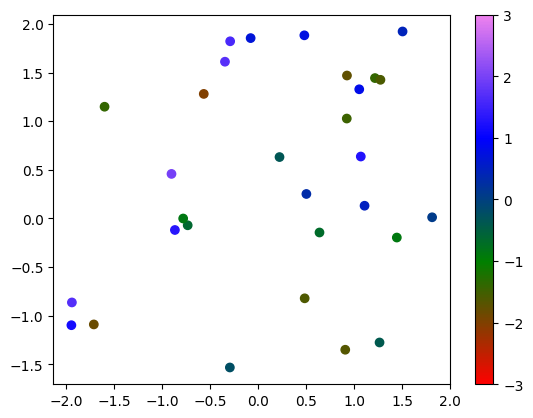

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

x,y,c = zip(*np.random.rand(30,3)*4-2)

norm=plt.Normalize(-3,3)
cmapee = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","green","blue","violet"])

plt.scatter(x,y,c=c, cmap=cmapee, norm=norm)
plt.colorbar()
plt.show()

In [97]:
cmapee(100)

(0.0, 0.4133794694348327, 0.17647058823529413, 1.0)

In [106]:
y

(1.3301775158063625,
 -0.5658301418069147,
 0.47907282224370595,
 1.2099803293902052,
 0.14367006096696056,
 0.9451309520797548,
 0.574453018095348,
 -1.1210742476225652,
 1.6774724189834607,
 -1.3626101743919925,
 1.8982008267711508,
 0.9726024111469571,
 -1.7343608395050798,
 1.2249210007600917,
 -1.1319969538206252,
 1.8625480004196584,
 -1.128580905270963,
 0.953430190192897,
 -0.007581720709939788,
 -1.852883459419587,
 0.5344354045885966,
 0.22405719120631984,
 1.7116905995771767,
 1.0705897419439334,
 -1.099273459874961,
 1.6162383665317344,
 -0.6060502564400685,
 -1.647644030796446,
 -1.1223954933356022,
 -0.5304962142086032)

In [103]:
colours_58 = ["mediumslateblue","mediumpurple","plum","darkblue","mediumblue","blue","royalblue","cornflowerblue","lightsteelblue","lightblue", "darkgreen","green","forestgreen","seagreen","mediumseagreen","limegreen","palegreen","darkred","firebrick","red","tomato","coral","lightsalmon","sandybrown"]


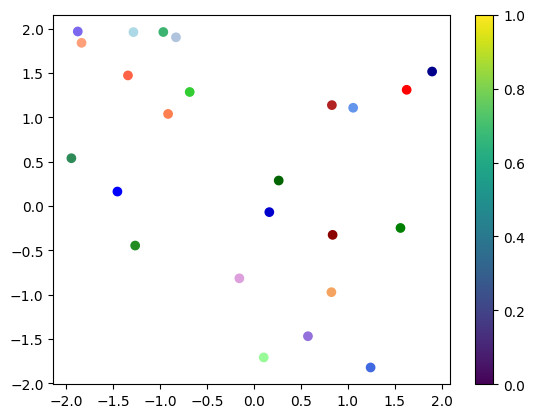

In [112]:
#x,y,c = zip(*np.random.rand(30,3)*4-2)

#norm=plt.Normalize(-3,3)
#cmapee = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","green","blue","violet"])
x1=x[0:24]
y1=y[0:24]
plt.scatter(x1,y1, c=colours_58)#, norm=norm)
plt.colorbar()
plt.show()

#### tSNE plain 

In [245]:
path_data_1 = 'NCI-N87_3D_forMistic/data_final/tSNE_2/metadata/' # FoFX001003_221018_brightfield/FoF7001003_221018_brightfield/' #'Archive/FoF7002005_221018_brightfield/'

In [246]:
tSNE_colors =  np.squeeze(np.array(pd.read_csv(os.path.join(path_data_1+'Cluster_categories.csv'),header= None)))

In [247]:
tSNE_colors.shape

(435,)

In [248]:
tSNE_coords =  np.array(pd.read_csv(os.path.join(path_data_1+'X_imagetSNE.csv'),header= None))

In [249]:
tSNE_coords.shape

(435, 2)

In [250]:
np.max(tSNE_colors)

28

In [251]:
colours_58 = ["black","dimgray","gray","darkgray","silver","mediumslateblue","mediumpurple","plum","darkblue","mediumblue","blue","royalblue","cornflowerblue","lightsteelblue","lightblue", "darkgreen","green","forestgreen","seagreen","mediumseagreen","limegreen","palegreen","darkred","firebrick","red","tomato","coral","lightsalmon","sandybrown"]


In [252]:
len(colours_58)

29

unique [ 1  2  3  4  9 10 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28]


Text(0.5, 1.0, 't-SNE')

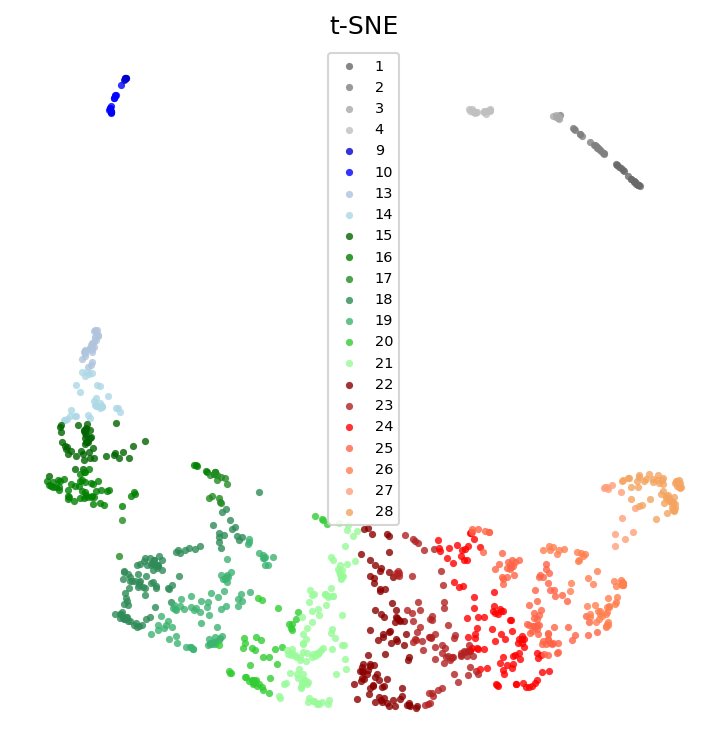

In [244]:

'''


## tSNE 1
unique, counts = np.unique(tSNE_colors, return_counts=True)
print('unique',str(unique))

#t-SNE plots
target_ids = range(len(unique))
plt.figure(figsize=(6,6),frameon=False,dpi=150)
plt.axis('off')
#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i,  label in zip(target_ids,  unique):
    #print(i)
    #print(label)
    c=colours_58[label] #cm.colors[i]
    #print(c)
    plt.scatter(tSNE_coords[ tSNE_colors==label, 0], tSNE_coords[ tSNE_colors==label, 1], color=c,label=label,s=12,linewidths=0,alpha=0.8)
plt.legend(fontsize='x-small',loc='upper center')
plt.title('t-SNE')
'''

unique [ 1  2 10 11 12 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28]


Text(0.5, 1.0, 't-SNE')

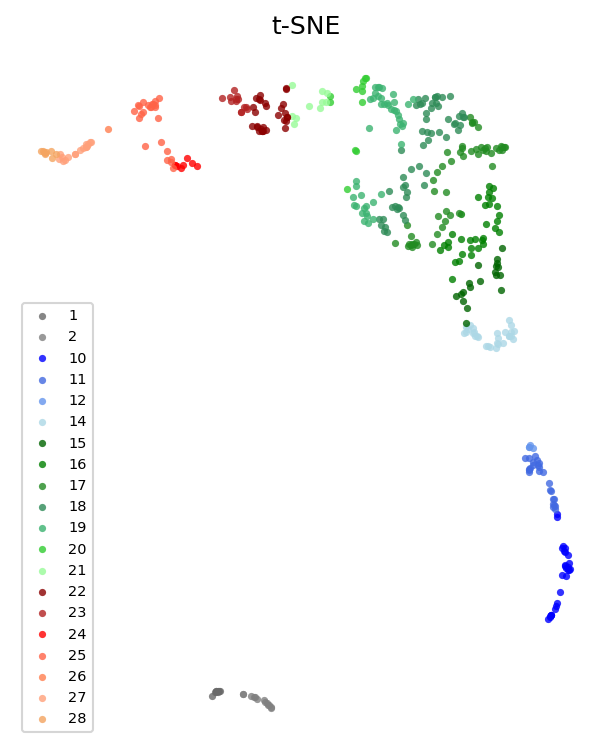

In [263]:

## tSNE 2
unique, counts = np.unique(tSNE_colors, return_counts=True)
print('unique',str(unique))

#t-SNE plots
target_ids = range(len(unique))
plt.figure(figsize=(5,6),frameon=False,dpi=150)
plt.axis('off')
#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i,  label in zip(target_ids,  unique):
    #print(i)
    #print(label)
    c=colours_58[label] #cm.colors[i]
    #print(c)
    plt.scatter(tSNE_coords[ tSNE_colors==label, 0], tSNE_coords[ tSNE_colors==label, 1], color=c,label=label,s=12,linewidths=0,alpha=0.8)
plt.legend(fontsize='x-small',loc='lower left')
plt.title('t-SNE')

In [168]:
tSNE_colors==(label).shape

array([], shape=(1035, 0), dtype=bool)

#### bokeh rendering

In [270]:
import bokeh
path_data_2 = '/figures/' #'NCI-N87_3D_forMistic/data_final/final_plots/'
im = os.path.join(path_data_2+'image_tsne_tils_all_262_rot.png')

In [269]:
from bokeh.plotting import figure, show, output_file, output_notebook

#output_file('image.html')
output_notebook() #('image.html')

p = figure(x_range=(0,1), y_range=(0,1))
p.image_url(url=[im], x=0, y=1, w=0.8, h=0.6)
## could also leave out keywords
# p.image_url(['tree.png'], 0, 1, 0.8, h=0.6)  
show(p,)

Loading BokehJS ...

In [ ]:
from bokeh.plotting import figure, curdoc
x_range = (-20,-10) # could be anything - e.g.(0,1)
y_range = (20,30)
p = figure(x_range=x_range, y_range=y_range)
#img_path = 'https://docs.bokeh.org/en/latest/_static/images/logo.png'
img_path = 'server_folder/static/logo.png'
p.image_url(url=[img_path],x=x_range[0],y=y_range[1],w=x_range[1]-x_range[0],h=y_range[1]-y_range[0])
doc = curdoc()
doc.add_root(p)